In [2]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X= 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

Text(0, 0.5, 'Y Dataset')

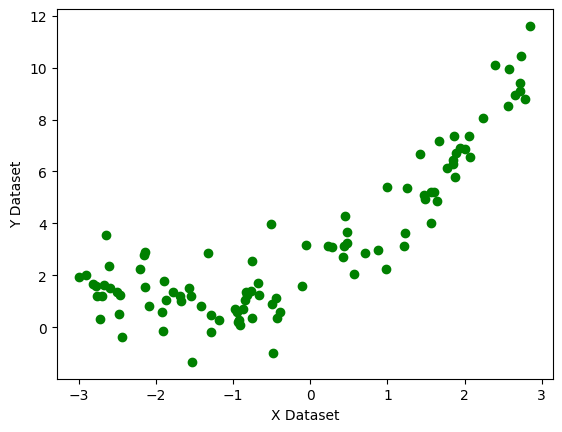

In [4]:
plt.scatter(X, y, color='g')
plt.xlabel("X Dataset")
plt.ylabel("Y Dataset")

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [7]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression.predict(X_test))
print("{:.1%}".format(score))

68.4%


In [8]:
X_train

array([[-2.46894207],
       [ 1.77062537],
       [-0.91024266],
       [-0.93392332],
       [-0.76402495],
       [-2.69026465],
       [-0.44373444],
       [ 0.44713303],
       [ 2.57314485],
       [ 2.65325744],
       [-2.4351882 ],
       [ 1.22596916],
       [-1.5330169 ],
       [ 1.24933702],
       [ 2.72469429],
       [ 1.86863983],
       [-2.49562957],
       [-2.09074903],
       [-1.87223934],
       [-2.5885736 ],
       [-0.39551359],
       [ 1.88822895],
       [-0.67393346],
       [ 2.0726521 ],
       [-0.4296071 ],
       [ 1.60462569],
       [ 1.87110116],
       [-0.86695048],
       [-2.14025708],
       [-1.4082637 ],
       [-2.20816719],
       [ 1.21874864],
       [-2.47707036],
       [-0.7491456 ],
       [ 1.4724487 ],
       [-0.66259215],
       [ 1.9469681 ],
       [ 2.23555203],
       [ 2.78157982],
       [ 0.98202332],
       [-1.5402656 ],
       [-0.75418968],
       [-1.28406801],
       [ 0.44388213],
       [-0.8278372 ],
       [ 2

Text(0, 0.5, 'Y')

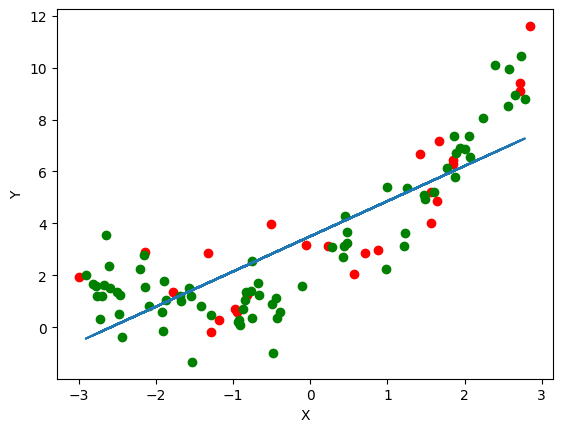

In [9]:
plt.plot(X_train, regression.predict(X_train))
plt.scatter(X_test, y_test, c='r')
plt.scatter(X_train, y_train, c='g')
plt.xlabel("X")
plt.ylabel("Y")

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [11]:
regression_poly = LinearRegression()
regression_poly.fit(X_train_poly, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_poly.predict(X_test_poly))
print("{:.2%}".format(score))

86.32%


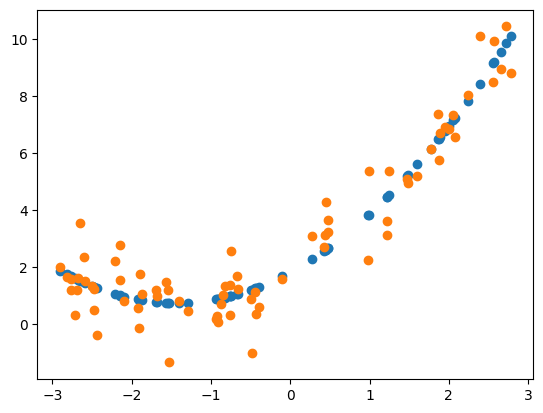

In [13]:
plt.scatter(X_train,regression_poly.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [14]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
predict_y_new_data = regression_poly.predict(X_new_poly)

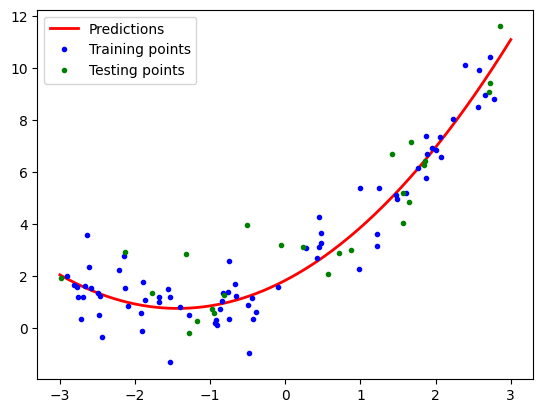

In [15]:
plt.plot(X_new, predict_y_new_data, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", linewidth=2, label="Training points")
plt.plot(X_test, y_test, "g.", linewidth=2, label="Testing points")
plt.legend()

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200,1)
    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    linear_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features",poly_features),
        ("linear_reg", linear_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)

    plt.plot(X_new, y_pred_new, 'r', label = "Degree " + str(degree), linewidth=2)
    plt.plot(X_test, y_test, 'b.', linewidth=3)
    plt.plot(X_train, y_train, 'g.', linewidth=3)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc="upper left")
    plt.show()
    

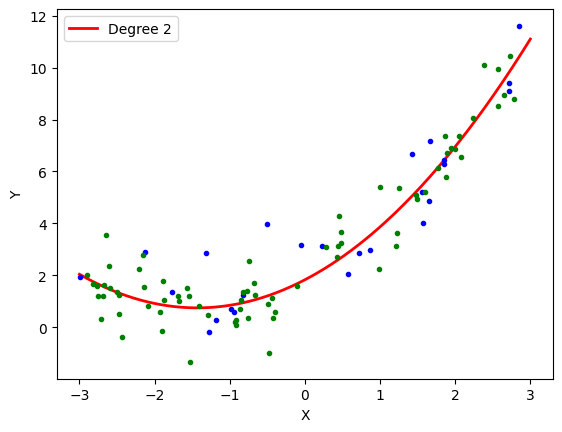

In [18]:
poly_regression(2)